<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula05b_single_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

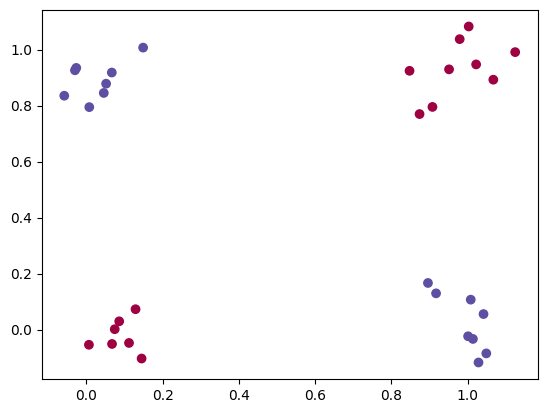

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


def plot_dataset(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    return plt


def plot_hiperplano(vector, intercept):
  xs = np.array([0, 1])
  ys = -(vector[0] * xs + intercept) / vector[1]
  plt.plot(xs, ys, '-')


def make_logical_dataset(n=40, func=lambda a, b: bool(a) != bool(b)):
  X, y = make_blobs(n_samples=n,
                     centers=[[0,0],[1,0],[1,1],[0,1]],
                     cluster_std=0.1)
  y = np.array([func(a>0.5, b>0.5) for a, b in zip(X[:, 0], X[:, 1])], dtype=int) * 2 - 1
  return X, y


def define_axes(X, offset):
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]


def plot_predictions(clf, X, offset = 0.5):
    axes = define_axes(X, offset)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)


X, y = make_logical_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
_ = plot_dataset(X_train, y_train)

1.0


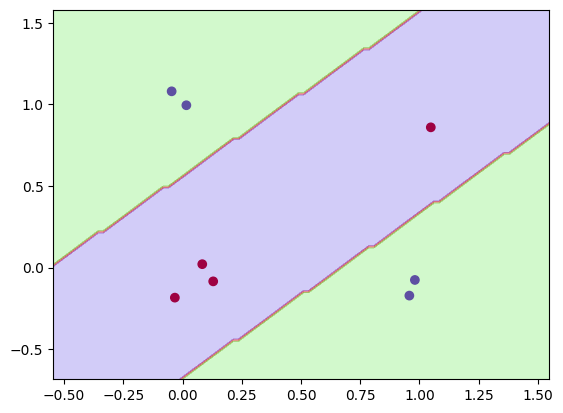

In [40]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def sign(x):
  return np.sign(x)

def include_bias(X):
  bias = np.ones((X.shape[0],1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class MLP(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=1000, learning_rate=0.001):
    self.max_iter = max_iter
    self.learning_rate = learning_rate

  def foward(self, X):
    Xb = include_bias(X)
    self.pH = Xb @ self.ihw
    self.H = np.tanh(self.pH)
    self.Hb = include_bias(self.H)
    ypred = self.Hb @ self.how
    return ypred

  def backward(self, y, ypred):
    error = y - ypred
    self.how += self.Hb.T @ error * self.learning_rate

  def fit(self, X, y):
    self.ihw = np.array([[0.5, -1, 1], [0.5, 1, -1]]).T
    if len(y.shape) == 1:
      y = y.reshape(-1, 1)
    self.how = np.random.uniform(-1, 1, size=(self.ihw.shape[1]+1, y.shape[1]))
    for _ in range(self.max_iter):
      ypred = self.foward(X)
      self.backward(y, ypred)
    return self

  def predict(self, X):
    ypred = self.foward(X)
    return sign(ypred)

model = MLP()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(accuracy_score(y_test, ypred))
plot_predictions(model, X_test)
plot_dataset(X_test, y_test)
plt.show()

1.0


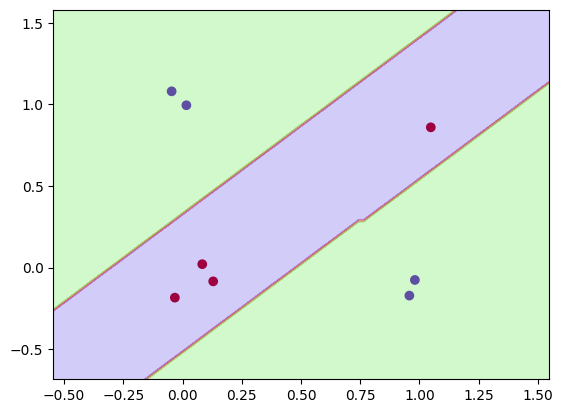

In [71]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def sign(x):
  return np.sign(x)

def include_bias(X):
  bias = np.ones((X.shape[0],1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class MLP(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=1000, learning_rate=0.01):
    self.max_iter = max_iter
    self.learning_rate = learning_rate

  def foward(self, X):
    self.Xb = include_bias(X)
    pH = self.Xb @ self.ihw
    self.H = np.tanh(pH)
    self.Hb = include_bias(self.H)
    ypred = self.Hb @ self.how
    return ypred

  def backward(self, y, ypred):
    ho_delta = y - ypred
    ho_grad = self.Hb.T @ ho_delta
    ### PULO DO GATO ###
    tanh_grad = (1 - self.H**2)
    ih_delta = ho_delta @ self.how[1:].T * tanh_grad
    ### #### ## #### ###
    ih_grad = self.Xb.T @ ih_delta
    self.ihw += ih_grad * self.learning_rate
    self.how += ho_grad * self.learning_rate

  def fit(self, X, y):
    if len(y.shape) == 1:
      y = y.reshape(-1, 1)
    self.ihw = np.random.uniform(-1, 1, size=(X.shape[1]+1, 2))
    self.how = np.random.uniform(-1, 1, size=(self.ihw.shape[1]+1, y.shape[1]))
    for _ in range(self.max_iter):
      ypred = self.foward(X)
      self.backward(y, ypred)
    return self

  def predict(self, X):
    ypred = self.foward(X)
    return sign(ypred)

model = MLP()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(accuracy_score(y_test, ypred))
plot_predictions(model, X_test)
plot_dataset(X_test, y_test)
plt.show()